In [64]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [65]:
titanicData = pd.read_csv('train.csv')
titanicData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
print("Data Type:", type(titanicData))
print("Data Dims", titanicData.shape)

Data Type: <class 'pandas.core.frame.DataFrame'>
Data Dims (891, 12)


## Missing Values of Cabin

looking at Cabin data, most of the values are missing. This can be seen from more than 75% of data missing (204 out of 891 is NOT missing). So this is not valuable as a predictor. However, if someone has cabin, they paid a fare of at least 5.00.

In [67]:
CabinData = titanicData[titanicData.Cabin.notnull()]
display(CabinData)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


## Missing Values of Age

to address the missing values of age, we can either:  

1) Fill in the missing values with the average age of passengers,  
2) Fill in the missing values with the median age of passengers,  
3) Remove all data points with missing values of age.

thus, three separate datasets will be made to consider each scenario and to see if there are any major deviations due to method of filling in missing value.

In [68]:
titanicData["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

So, for "Age" Column:  
1) Mean is 29.7 years old.  
2) Median is 28.0 years old.  
3) there is 177 data sets missing, which is 19.9% of data missing.  

In [69]:
TitanicMean = titanicData.copy(deep = True)
TitanicMedian = titanicData.copy(deep = True)
TitanicRemove = titanicData.copy(deep = True)

In [70]:
TitanicMean["Age"] =  TitanicMean["Age"].fillna(29.7)
TitanicMedian["Age"] = TitanicMedian["Age"].fillna(28.0)
TitanicRemove = TitanicRemove[TitanicRemove.Age.notnull()]

In [71]:
display(TitanicMean)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.7,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [72]:
display(TitanicMedian)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [73]:
display(TitanicRemove)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


## Isolating Variables that have effect on Survival  

as of now, variables most likely to have an effect are Pclass, Sex, Age, SibSp, Parch, Fare and (PROBABLY) Embarked

## Isolating Categorical Variables

In [74]:
TitanicMeanCatVar = pd.DataFrame(TitanicMean[["Survived", "Pclass", "Sex",
                                               "Embarked"]])
TitanicMedianCatVar = pd.DataFrame(TitanicMedian[["Survived", "Pclass", "Sex",
                                               "Embarked"]])
TitanicRemoveCatVar = pd.DataFrame(TitanicRemove[["Survived", "Pclass", "Sex",
                                               "Embarked"]])

In [75]:
for var in TitanicMeanCatVar:
    TitanicMeanCatVar[var] = TitanicMeanCatVar[var].astype('category')
    
for var in TitanicMedianCatVar:
    TitanicMedianCatVar[var] = TitanicMedianCatVar[var].astype('category')
    
for var in TitanicRemoveCatVar:
    TitanicRemoveCatVar[var] = TitanicRemoveCatVar[var].astype('category')

## Isolating Numerical Variables

In [76]:
TitanicMeanNumVar = pd.DataFrame(TitanicMean[[ "Age", "Fare", "SibSp","Parch"]])
TitanicMedianNumVar = pd.DataFrame(TitanicMedian[[ "Age", "Fare", "SibSp","Parch"]])
TitanicRemoveNumVar = pd.DataFrame(TitanicRemove[[ "Age", "Fare", "SibSp","Parch"]])

In [77]:
TitanicMeanNumVar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
Age      891 non-null float64
Fare     891 non-null float64
SibSp    891 non-null int64
Parch    891 non-null int64
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


## Observing the Distribution of Numeric Variables

mean

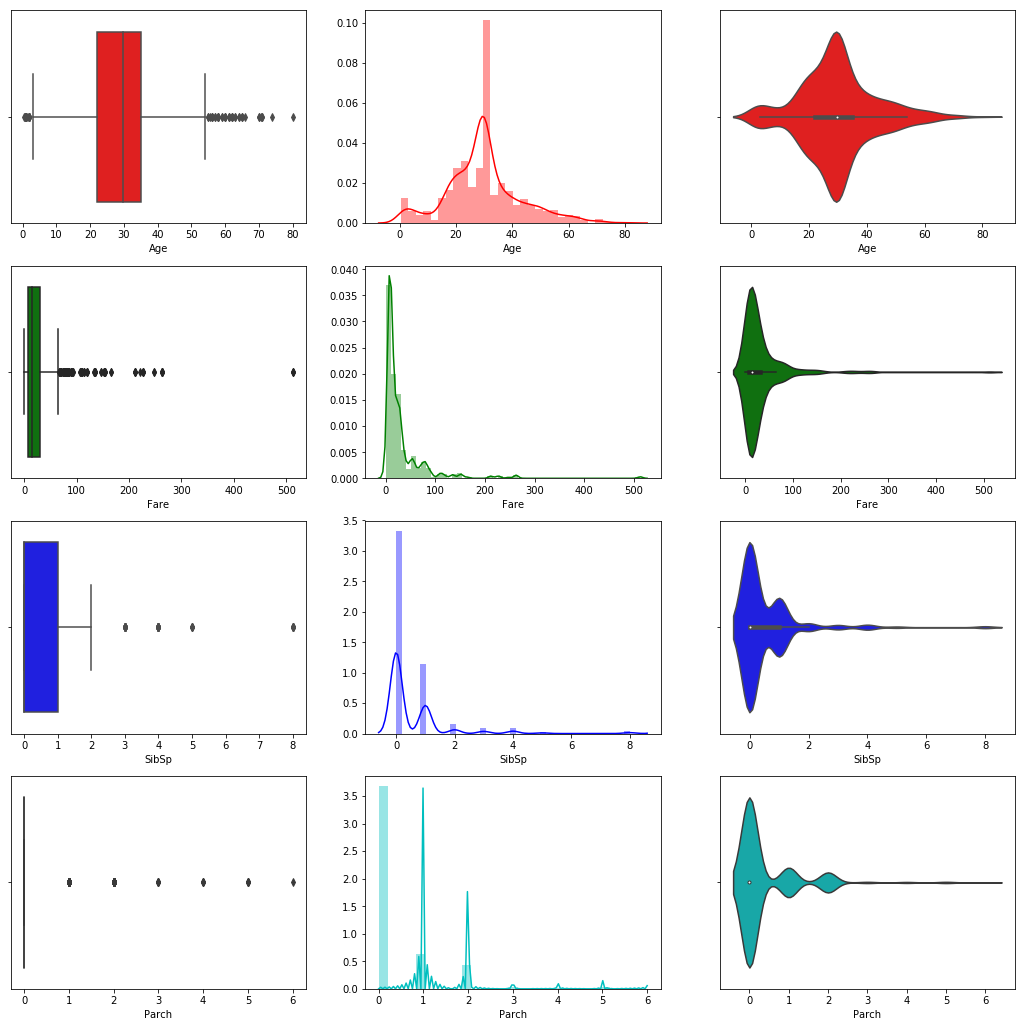

In [109]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3 , figsize=(18, 18))
colors = ["r", "g", "b", "c"]

count = 0
for var in TitanicMeanNumVar:
    sb.boxplot(TitanicMeanNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(TitanicMeanNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(TitanicMeanNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

median

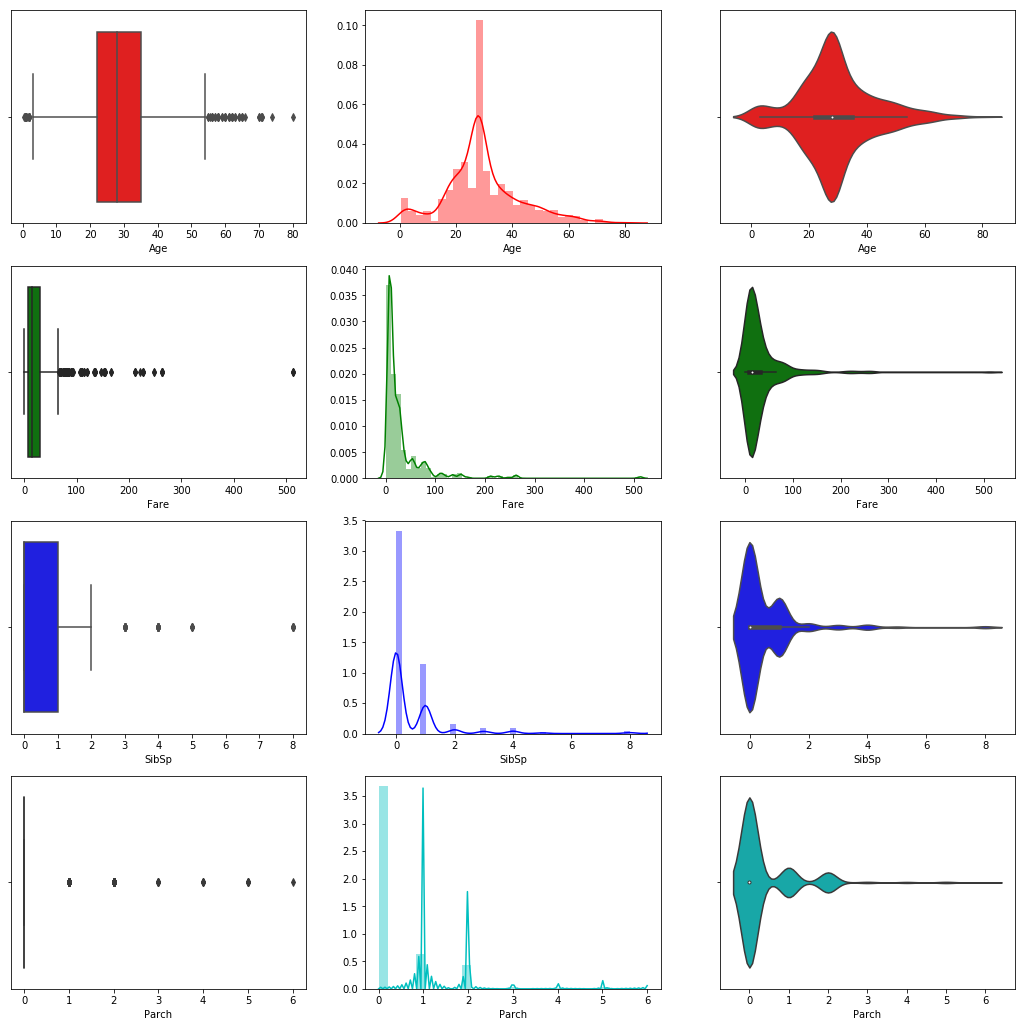

In [110]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3 , figsize=(18,18))
colors = ["r", "g", "b", "c"]

count = 0
for var in TitanicMedianNumVar:
    sb.boxplot(TitanicMedianNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(TitanicMedianNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(TitanicMedianNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

remove

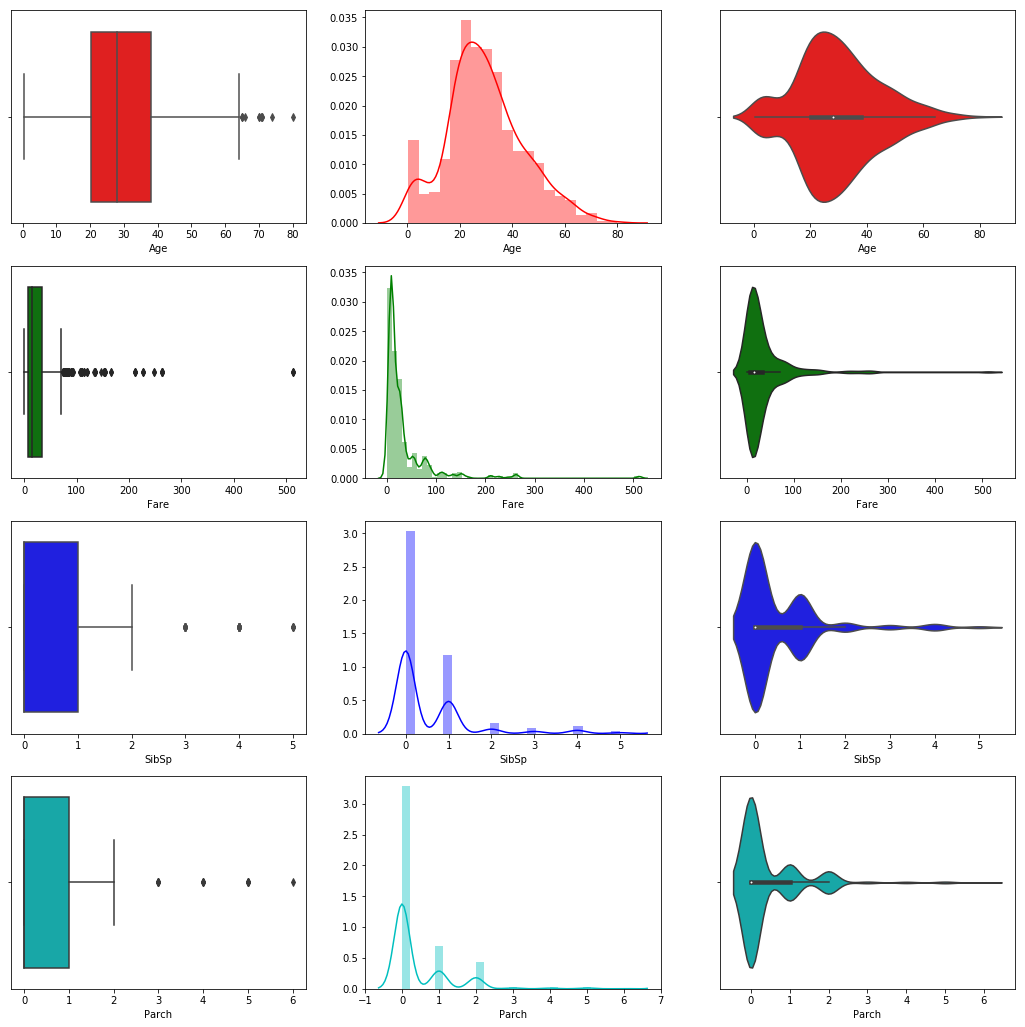

In [112]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3 , figsize=(18,18))
colors = ["r", "g", "b", "c"]

count = 0
for var in TitanicRemoveNumVar:
    sb.boxplot(TitanicRemoveNumVar[var], orient = "h", color = colors[count], ax = axes[count,0])
    sb.distplot(TitanicRemoveNumVar[var], color = colors[count], ax = axes[count,1])
    sb.violinplot(TitanicRemoveNumVar[var], color = colors[count], ax = axes[count,2])
    count += 1

## Observing the Categorical Variables

mean

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


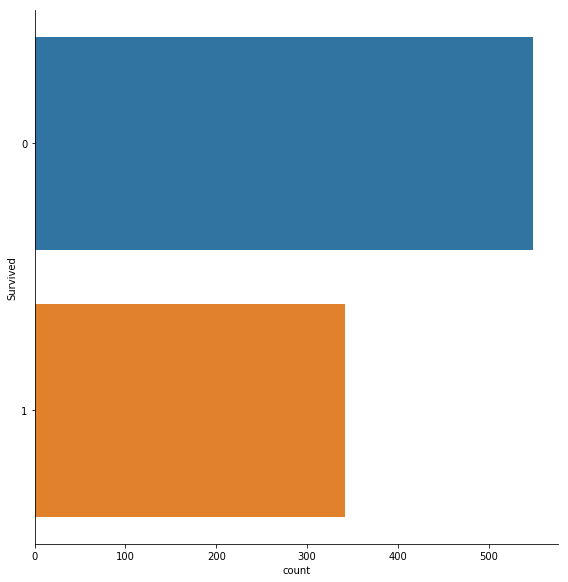

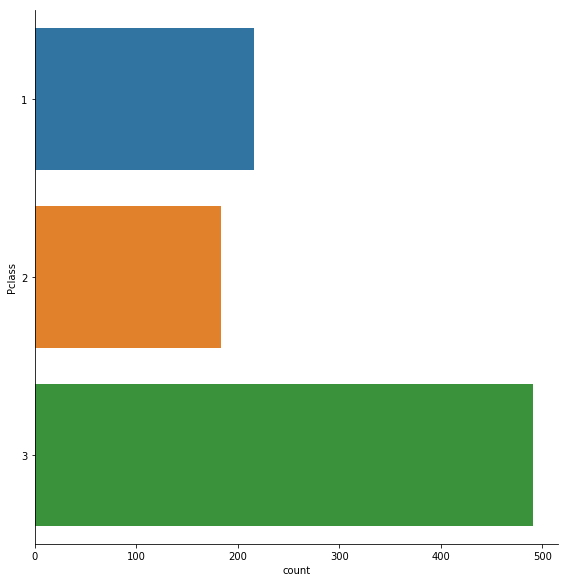

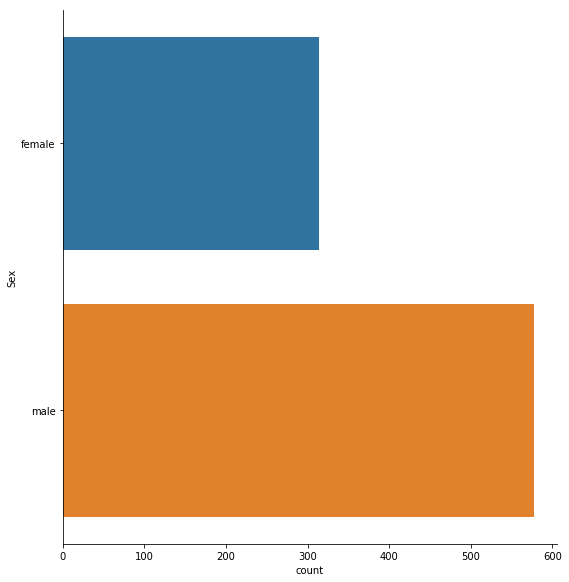

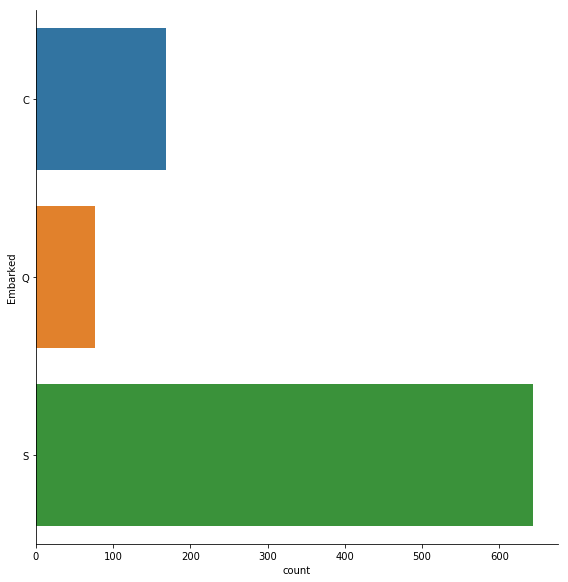

In [113]:
for i in TitanicMeanCatVar:
    print(TitanicMeanCatVar[i].value_counts())
    sb.catplot(y = i, data = TitanicMeanCatVar, kind = "count", height = 8)

median

0    549
1    342
Name: Survived, dtype: int64
3    491
1    216
2    184
Name: Pclass, dtype: int64
male      577
female    314
Name: Sex, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


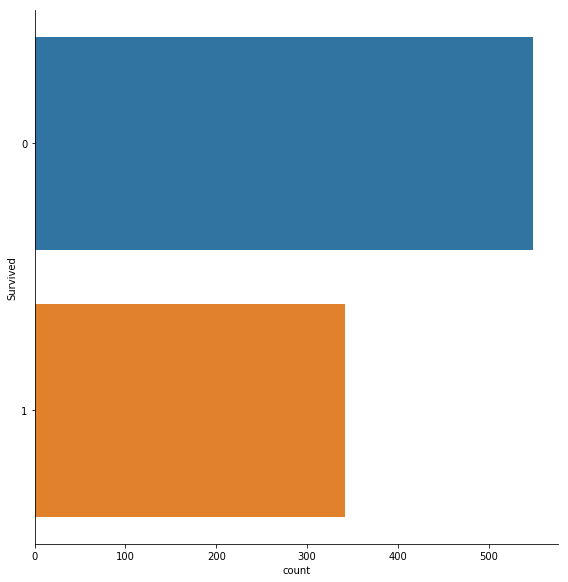

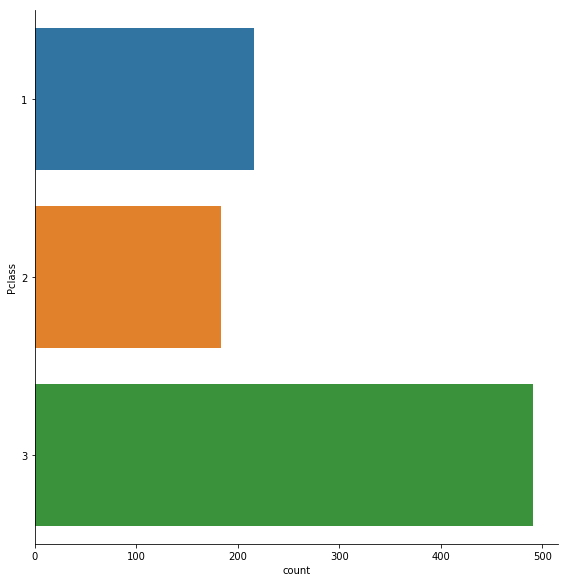

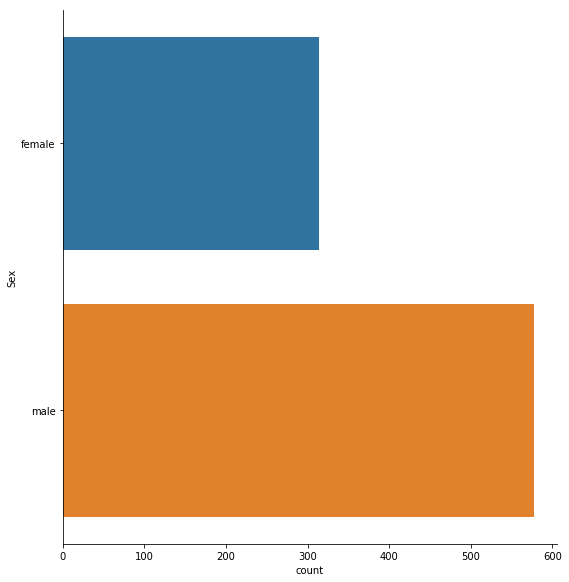

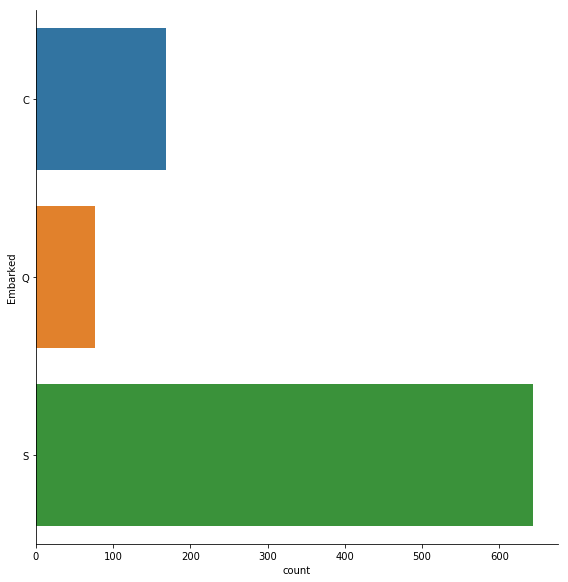

In [114]:
for i in TitanicMedianCatVar:
    print(TitanicMedianCatVar[i].value_counts())
    sb.catplot(y = i, data = TitanicMedianCatVar, kind = "count", height = 8)

remove

0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


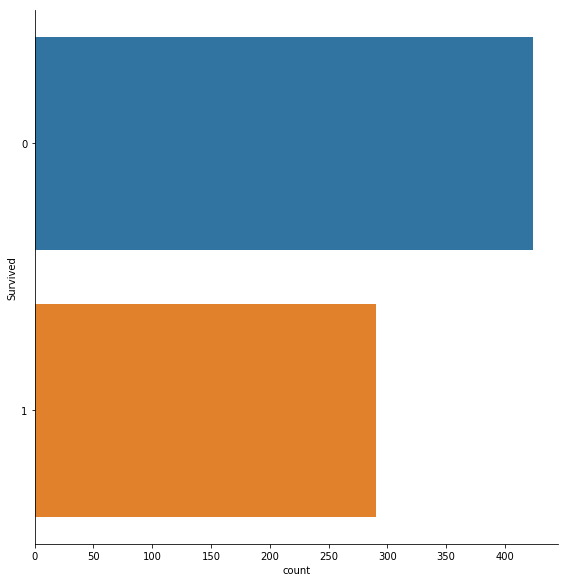

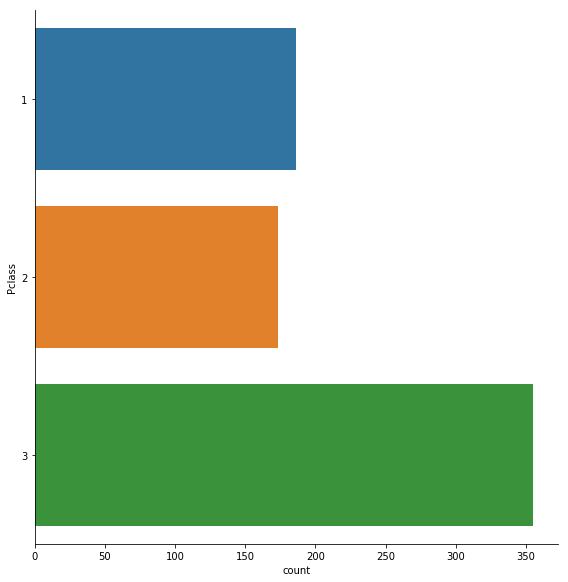

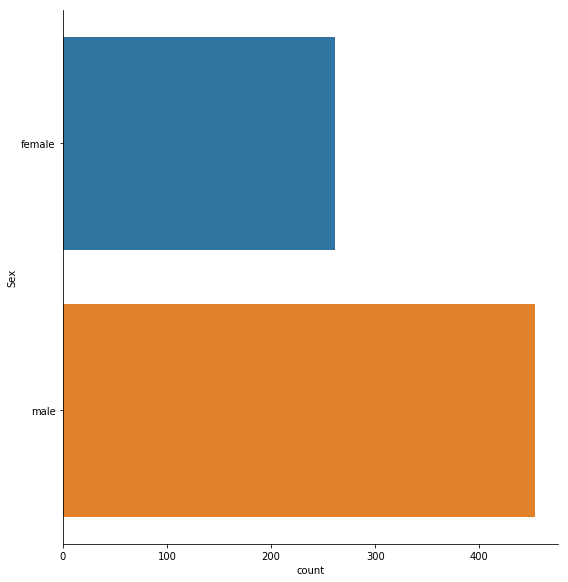

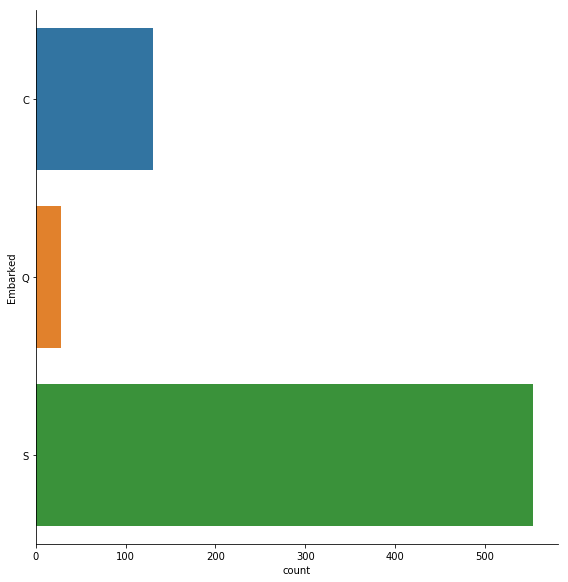

In [115]:
for i in TitanicRemoveCatVar:
    print(TitanicRemoveCatVar[i].value_counts())
    sb.catplot(y = i, data = TitanicRemoveCatVar, kind = "count", height = 8)

## Heatmap to Check Correlation of Categorical Variables against Survival

mean

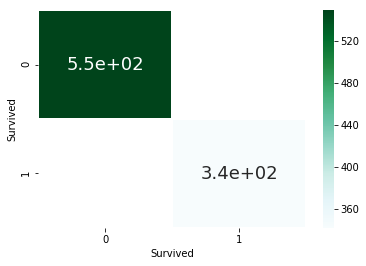

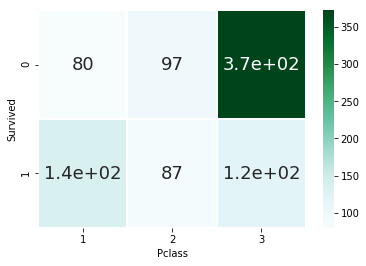

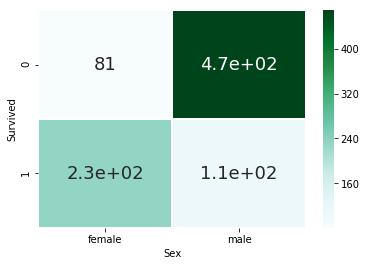

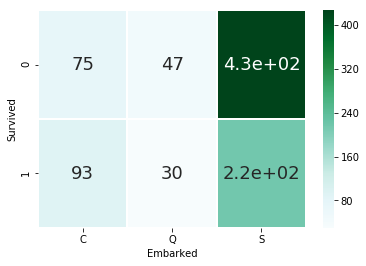

In [116]:
for i in TitanicMeanCatVar:
    f, axes = plt.subplots(1, 1)
    sb.heatmap(TitanicMeanCatVar.groupby(['Survived', i]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

median

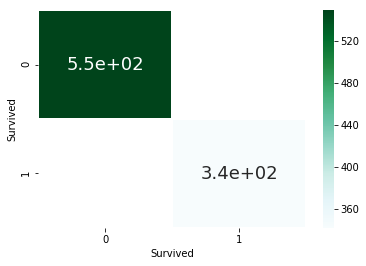

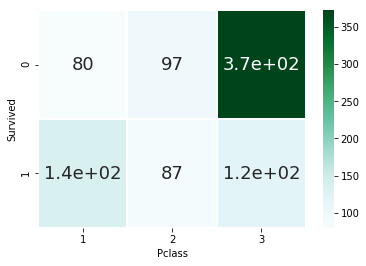

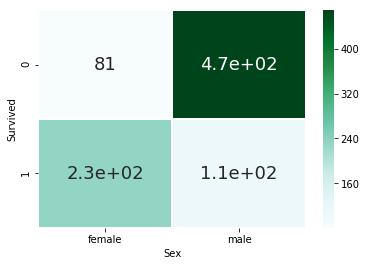

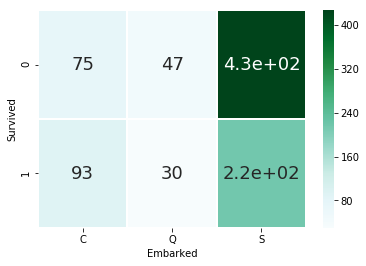

In [117]:
for i in TitanicMedianCatVar:
    f, axes = plt.subplots(1, 1)
    sb.heatmap(TitanicMedianCatVar.groupby(['Survived', i]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

remove

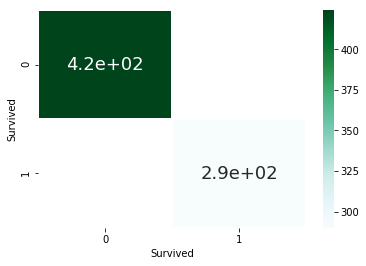

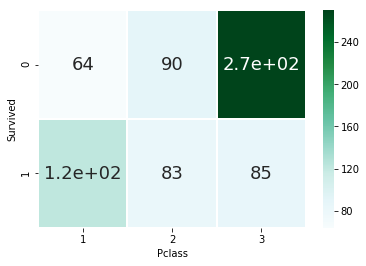

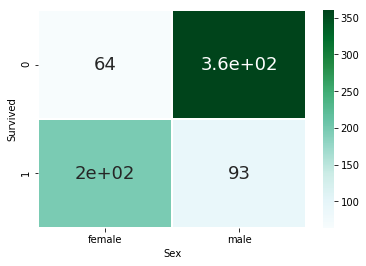

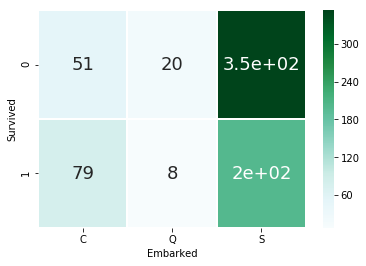

In [118]:
for i in TitanicRemoveCatVar:
    f, axes = plt.subplots(1, 1)
    sb.heatmap(TitanicRemoveCatVar.groupby(['Survived', i]).size().unstack(), 
           linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn")

## Plotting Numerical Variables Against Survived

mean

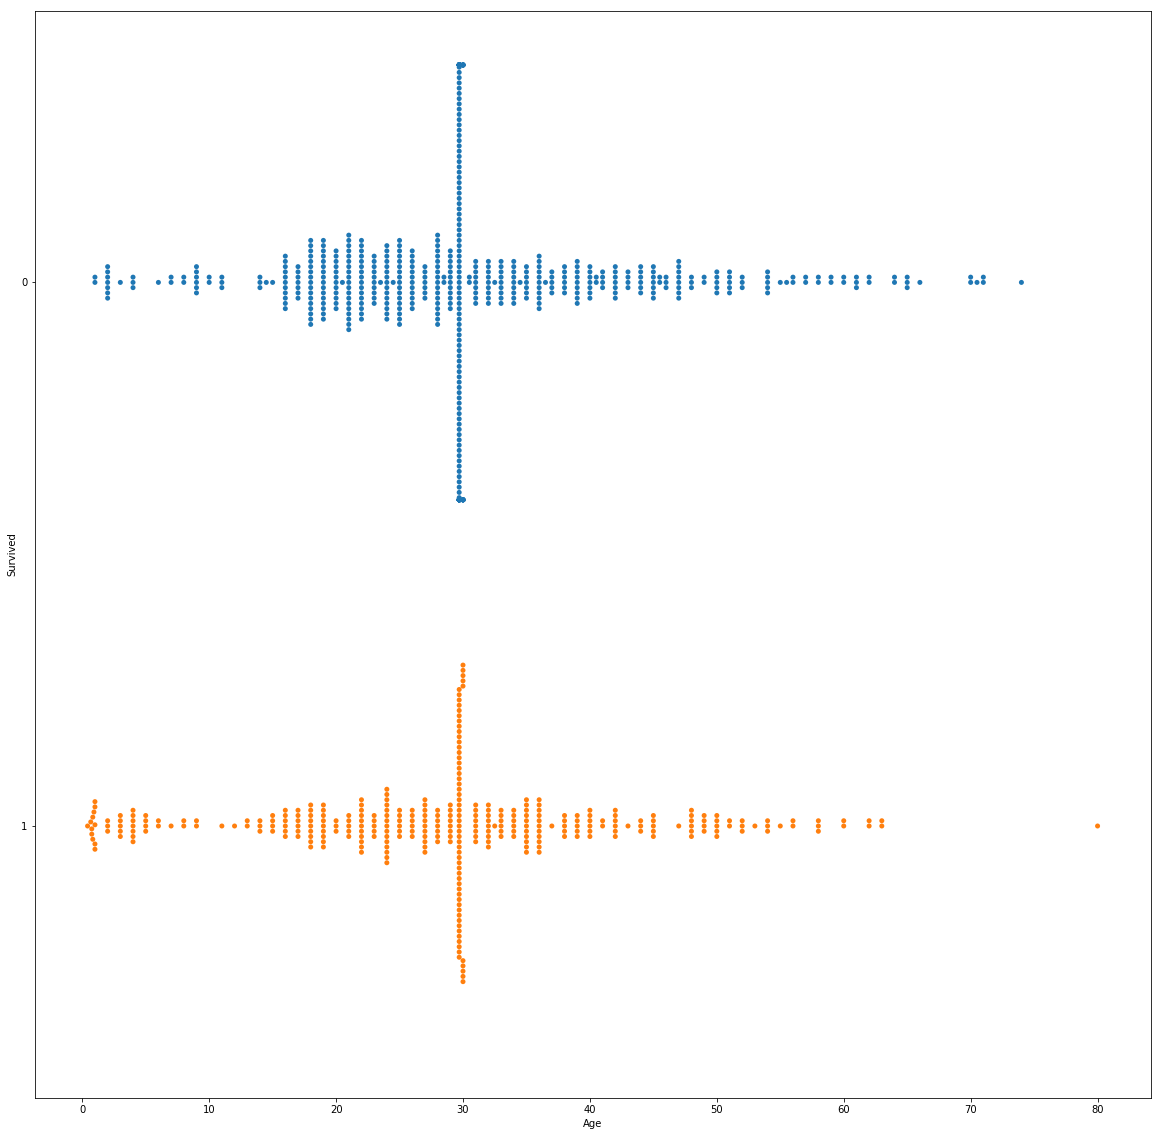

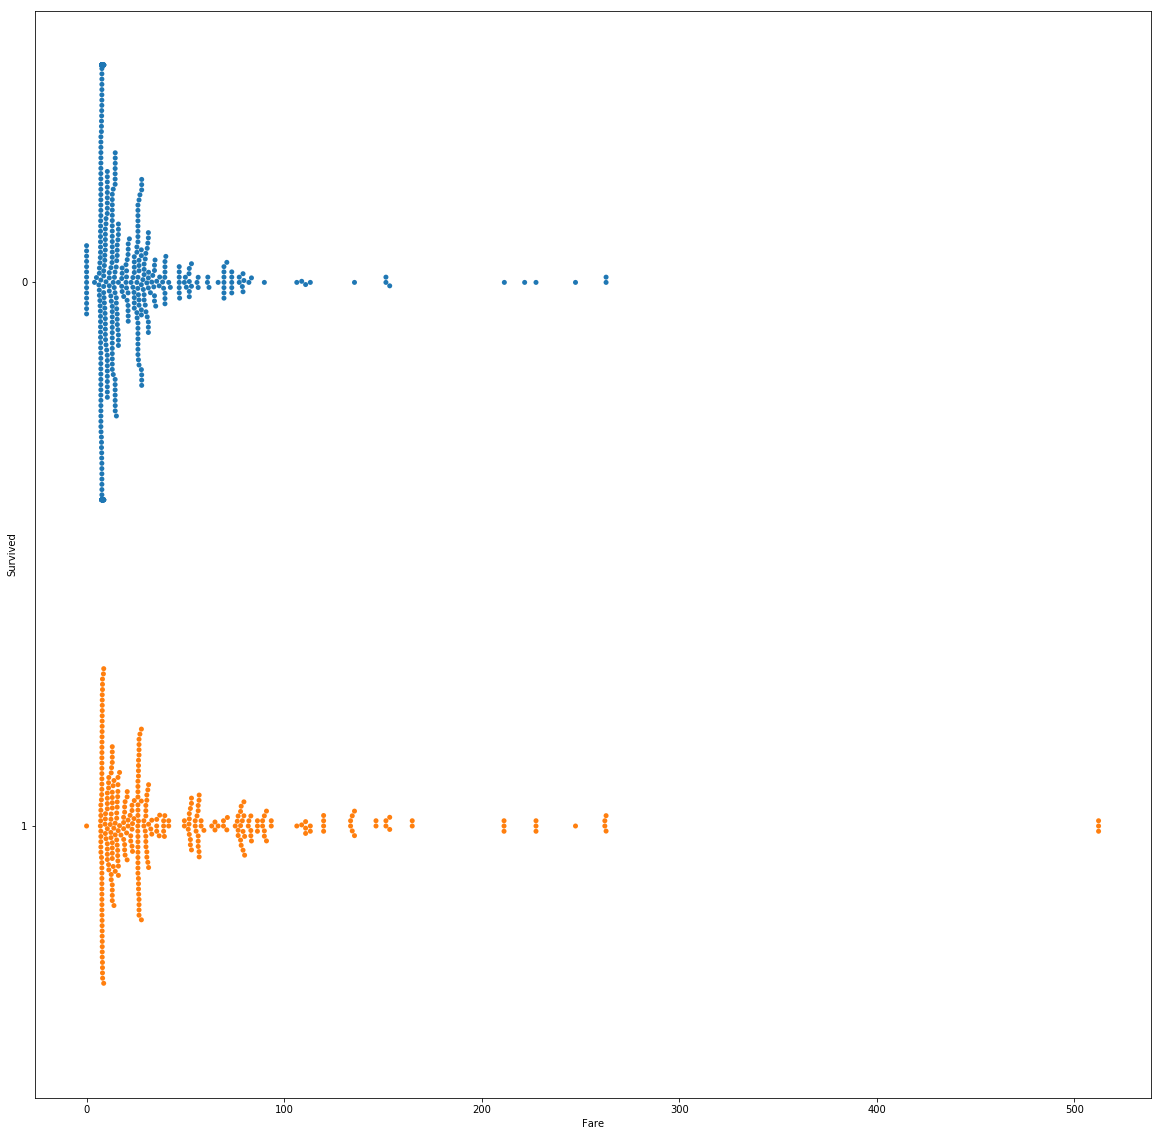

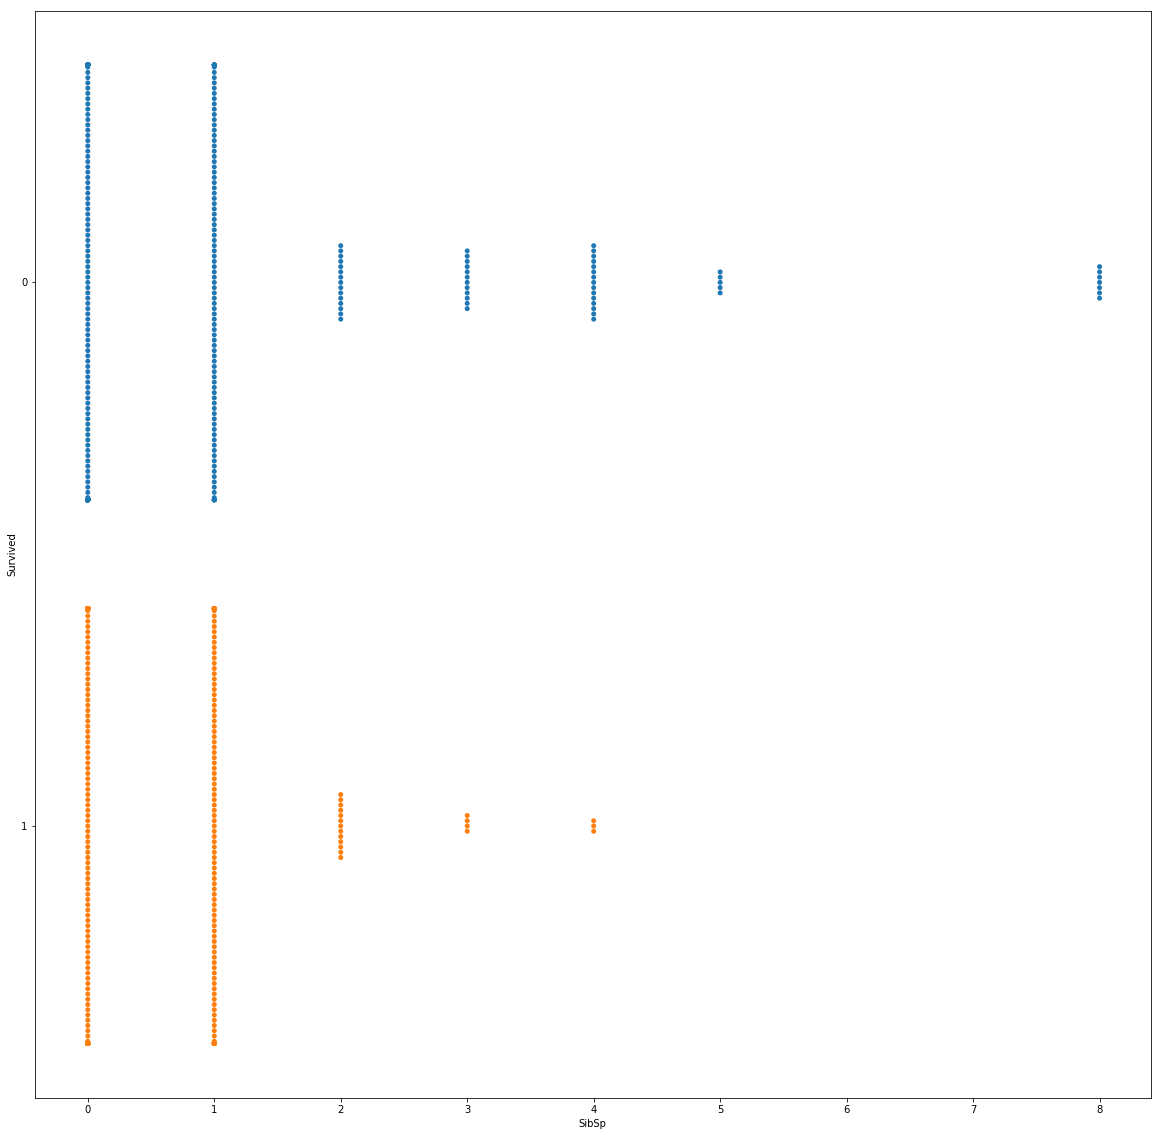

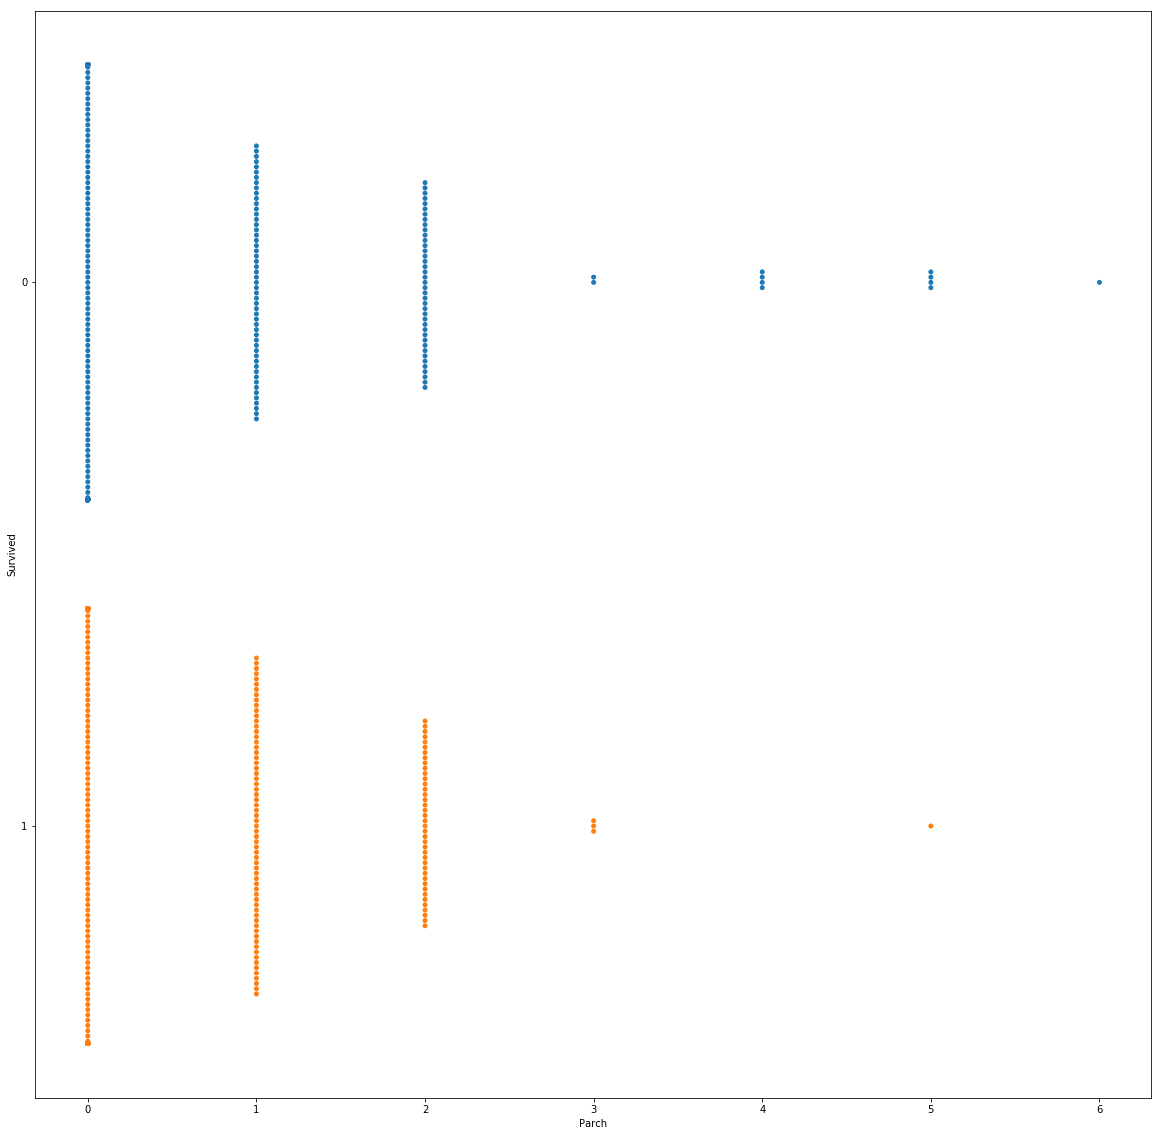

In [119]:
for var in TitanicMeanNumVar:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.swarmplot(x = var , y = TitanicMeanCatVar["Survived"], data = TitanicMeanNumVar)

median

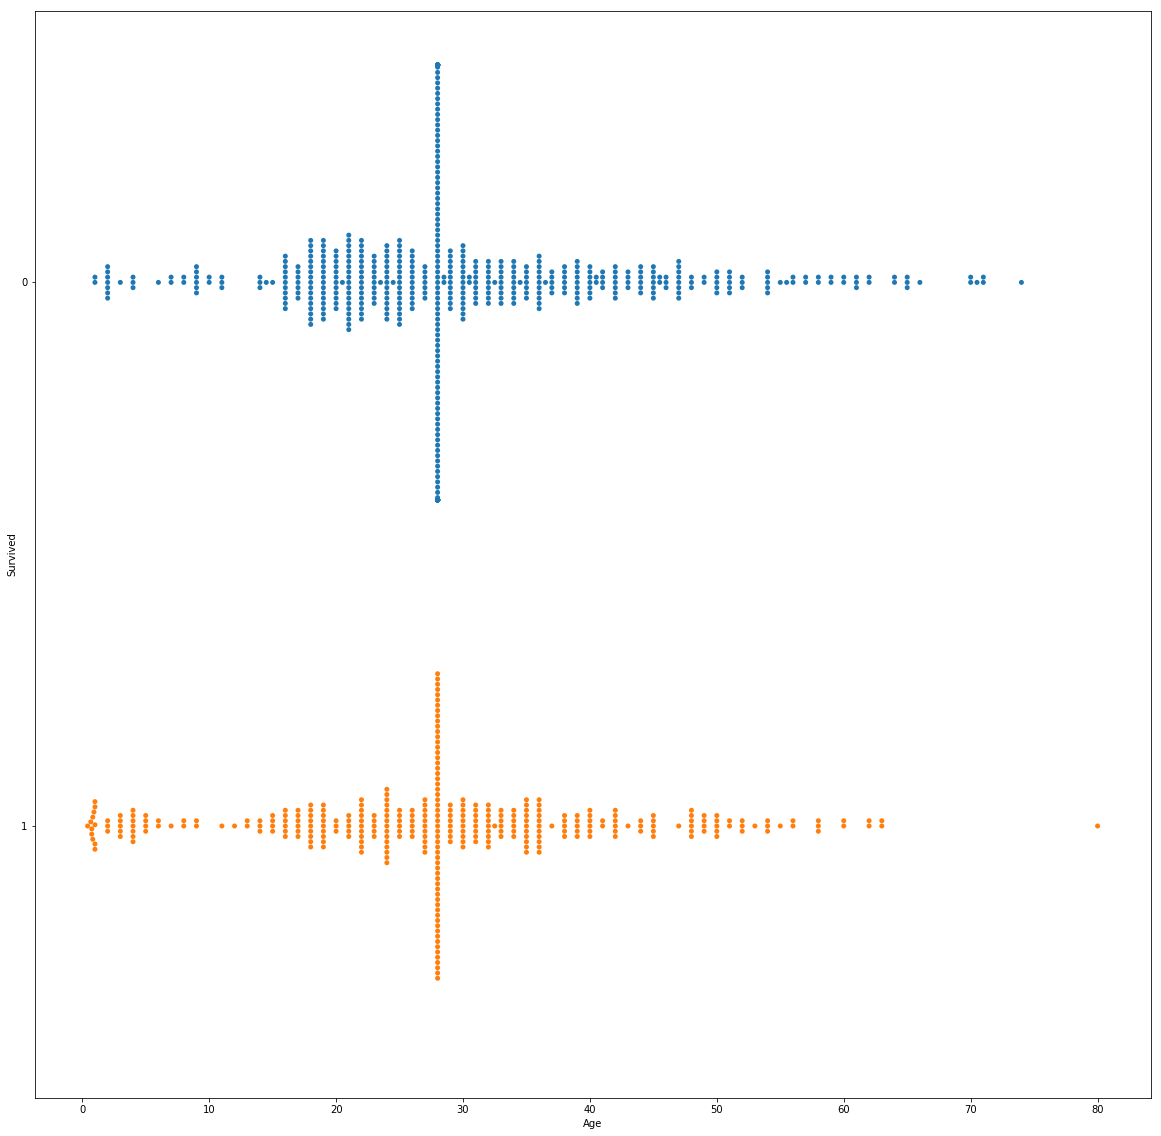

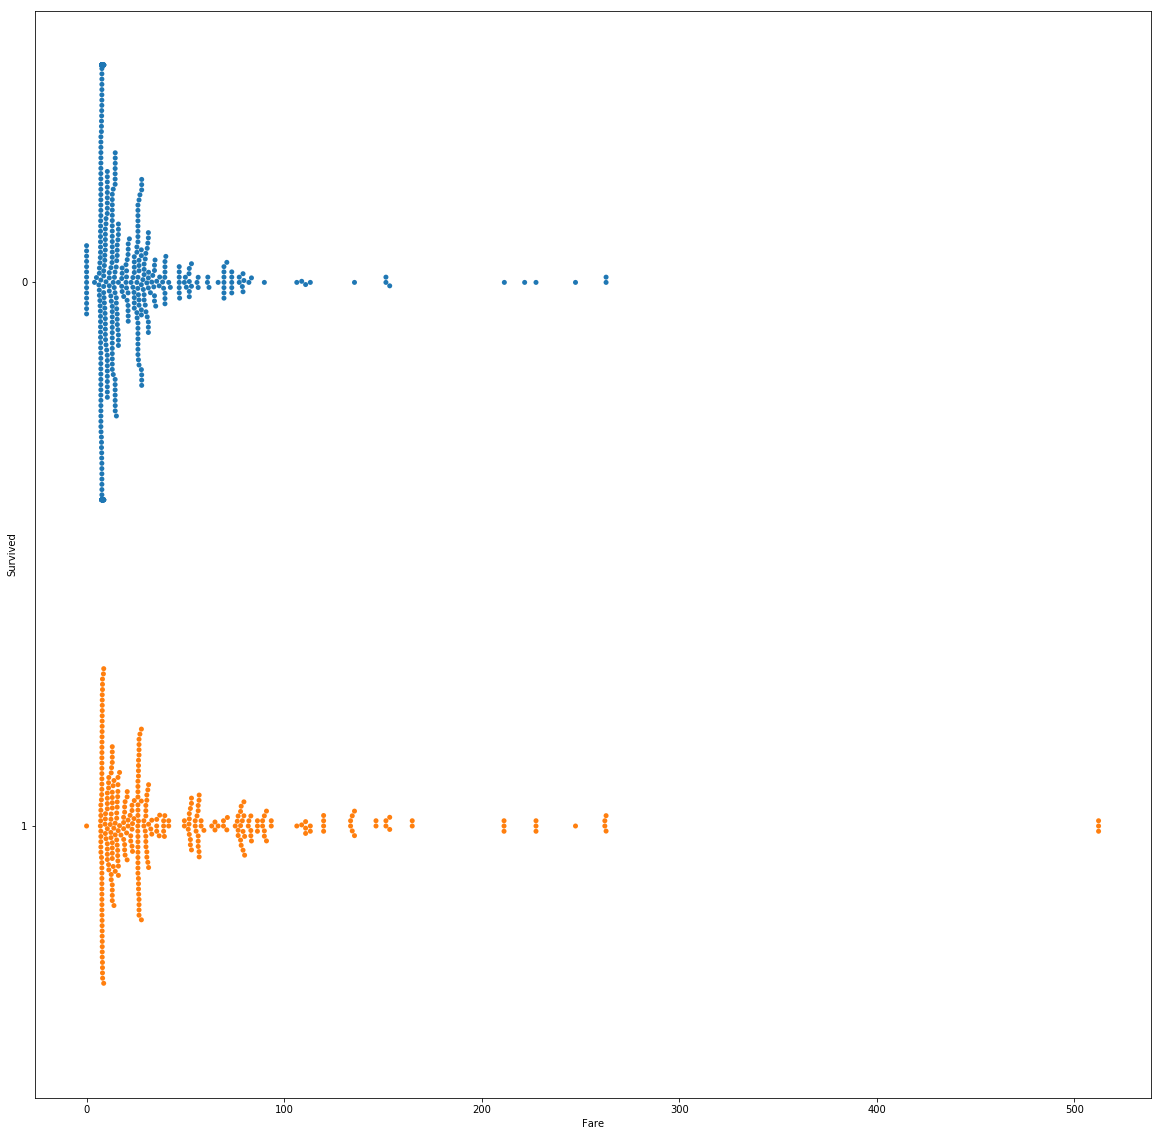

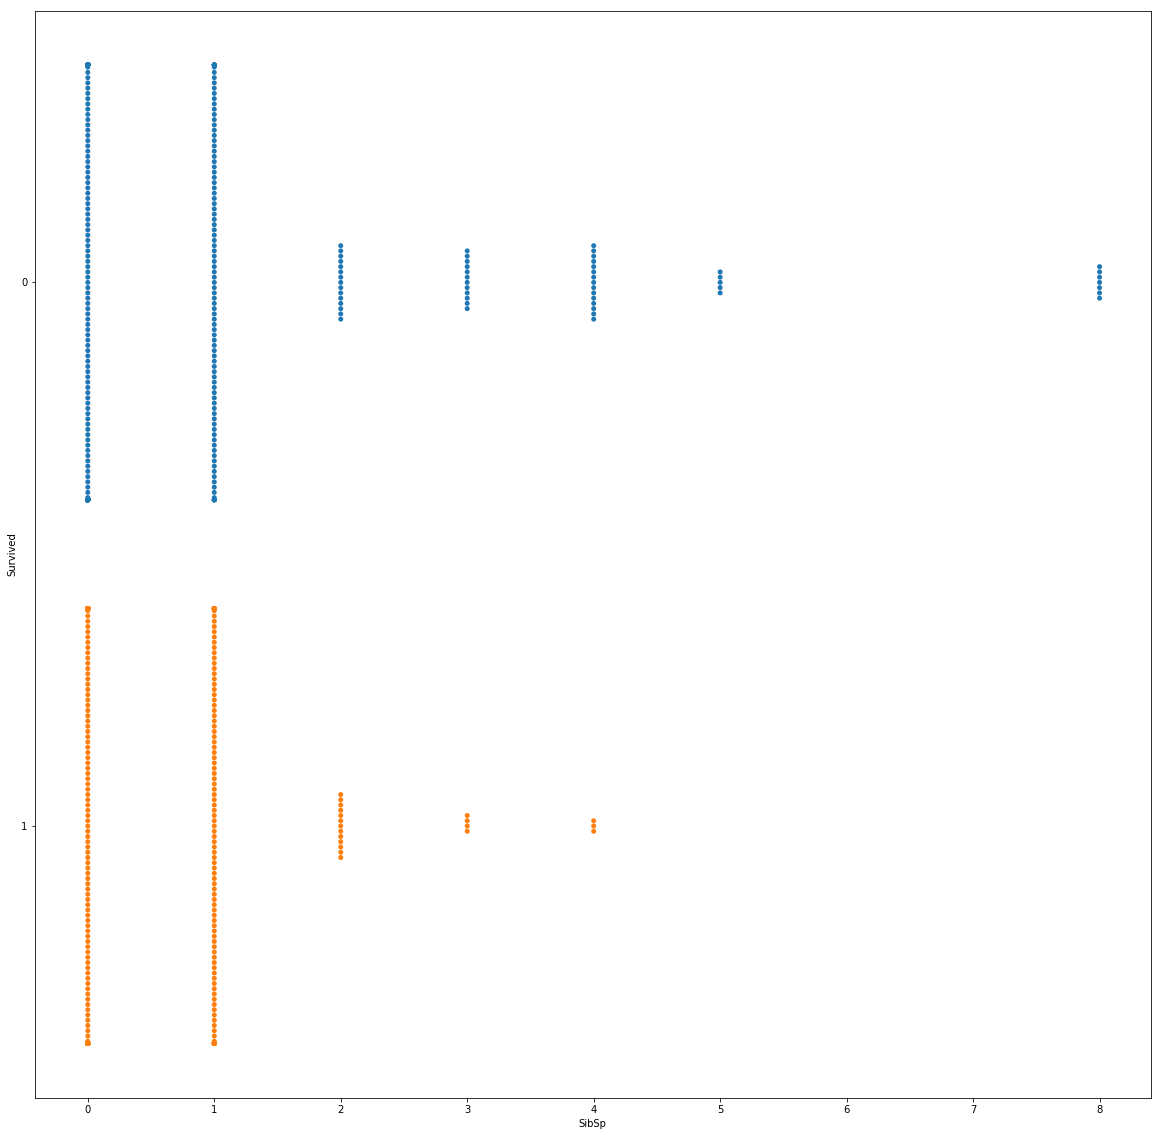

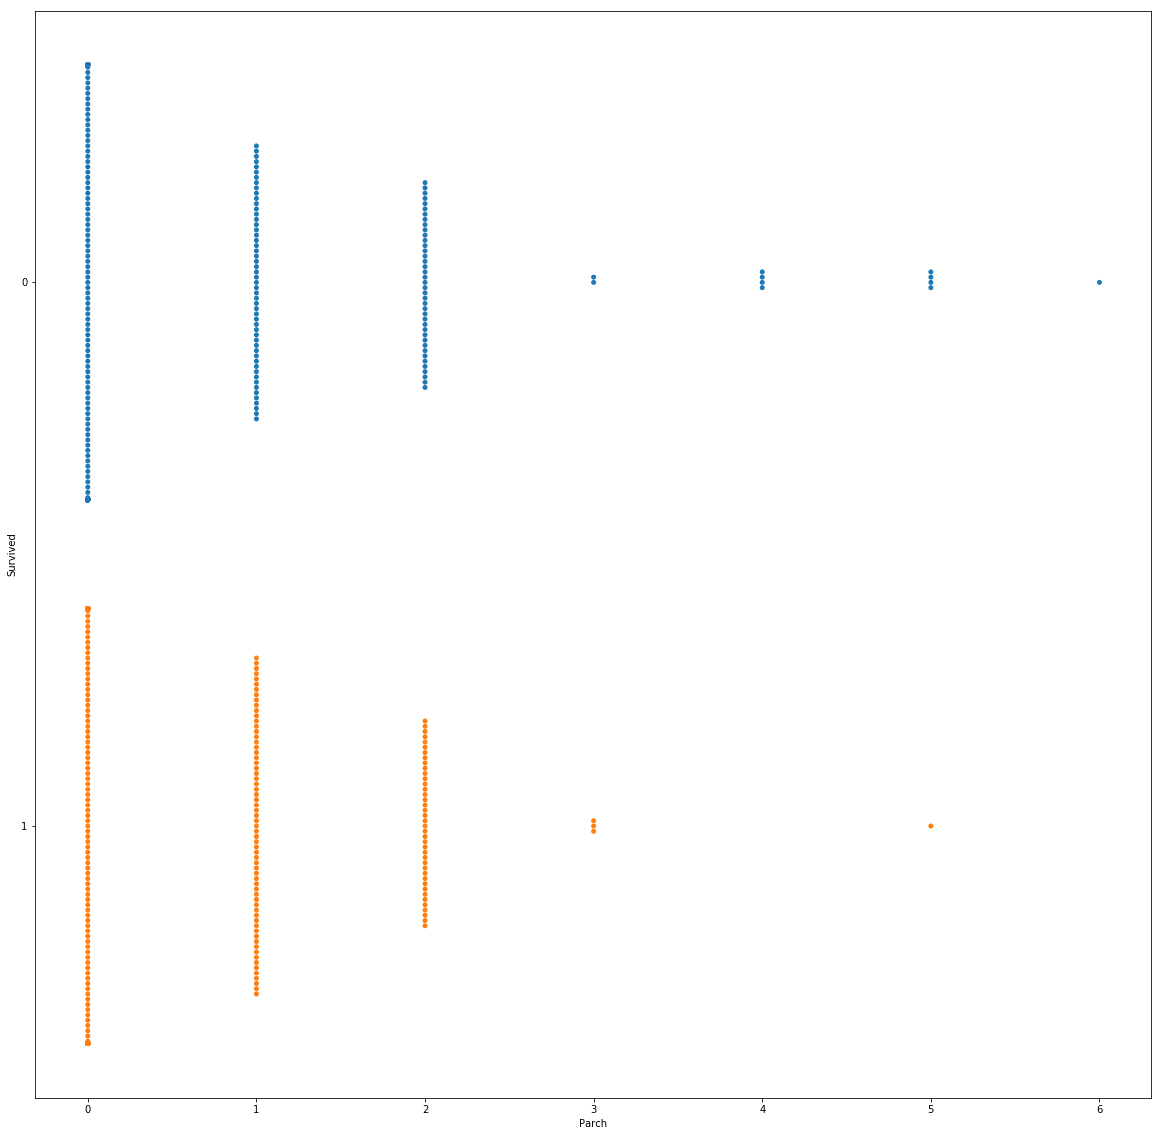

In [120]:
for var in TitanicMedianNumVar:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.swarmplot(x = var , y = TitanicMedianCatVar["Survived"], data = TitanicMedianNumVar)

remove

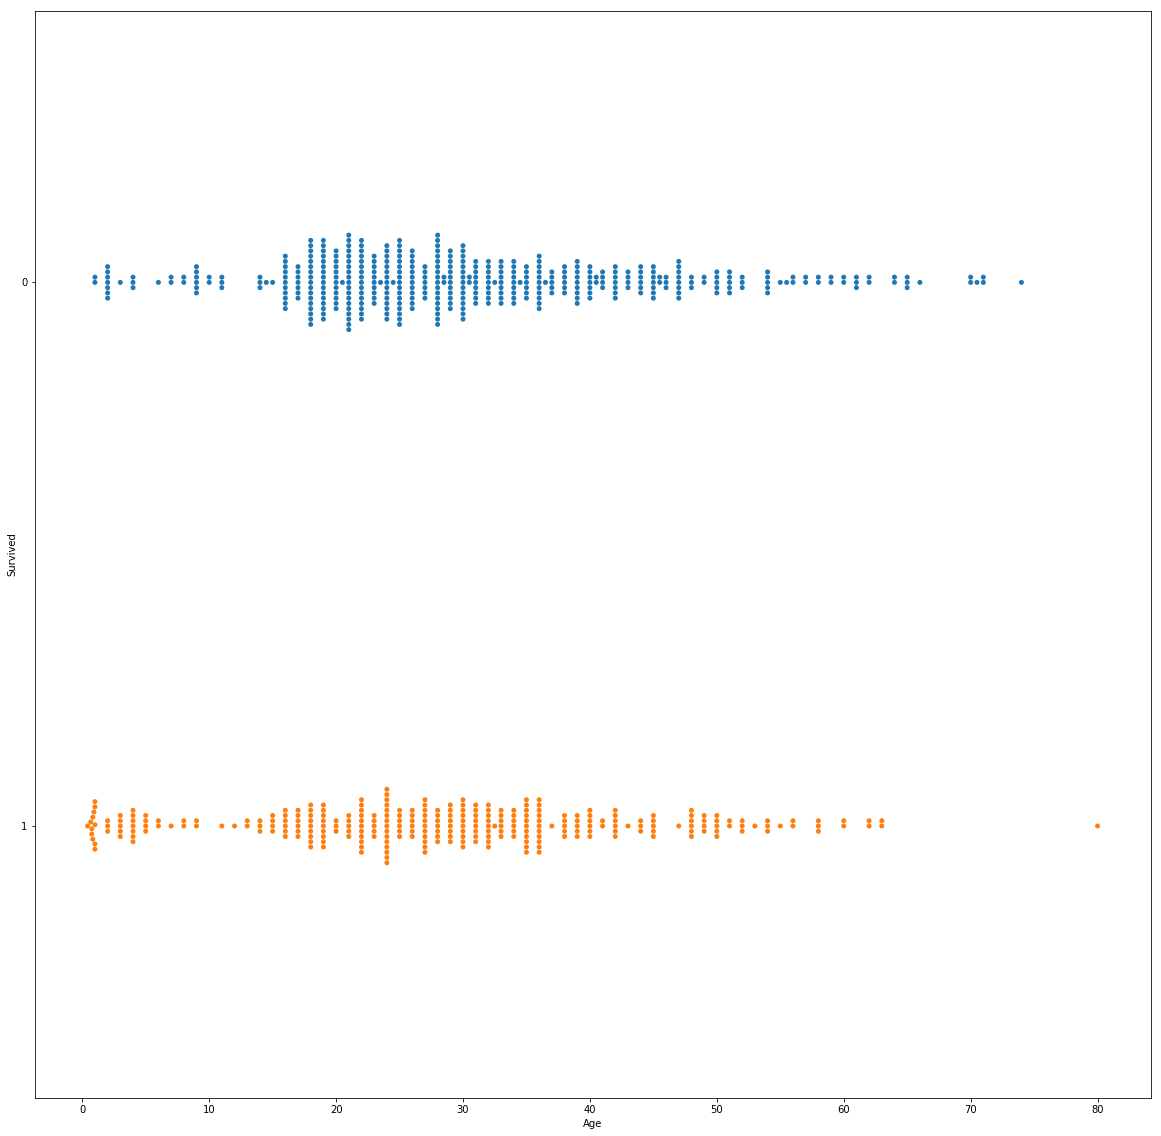

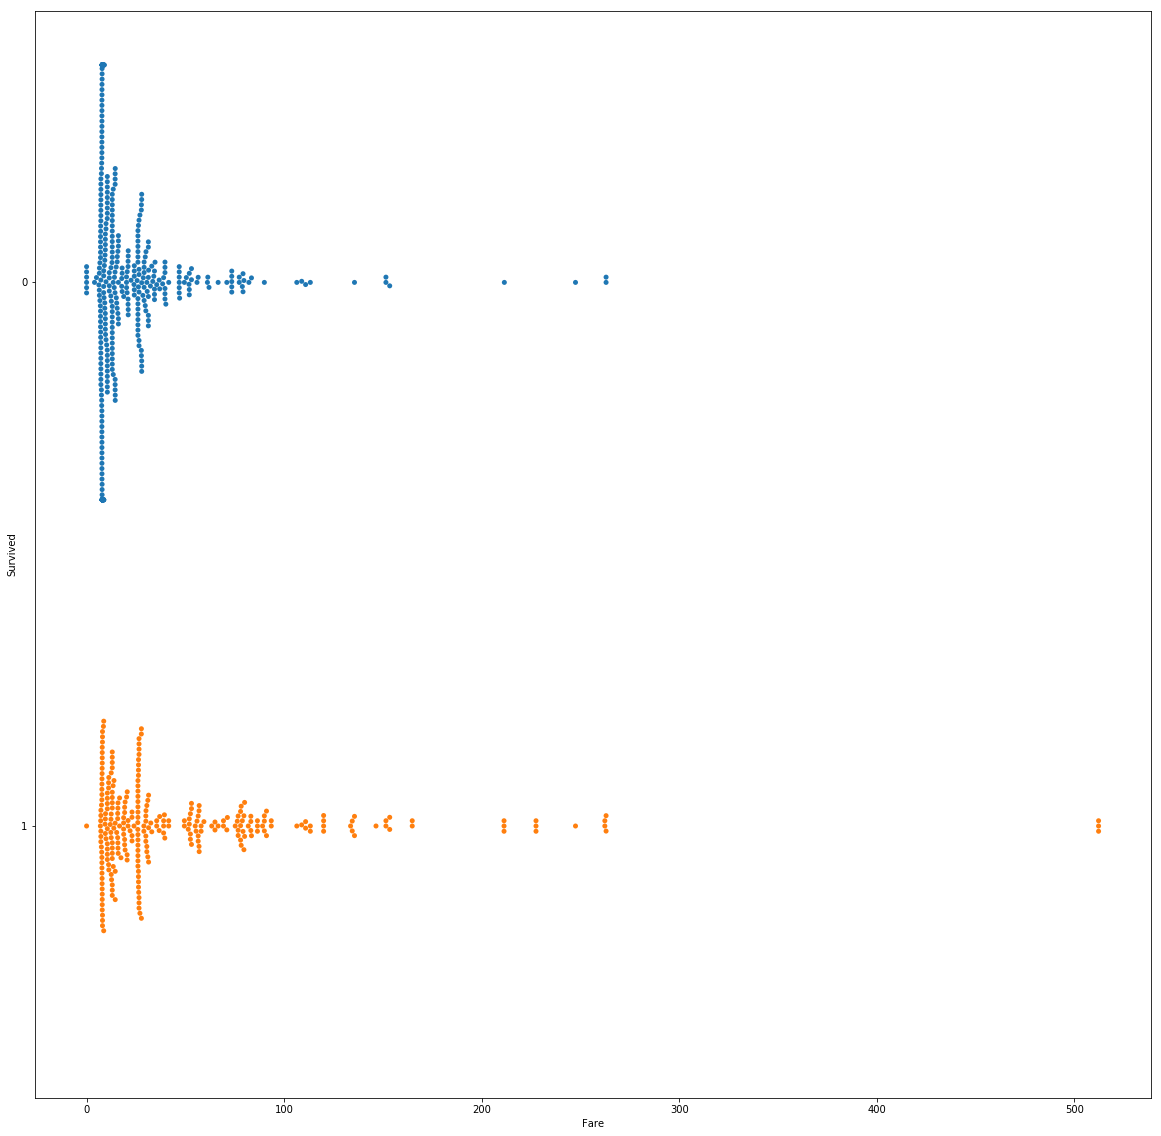

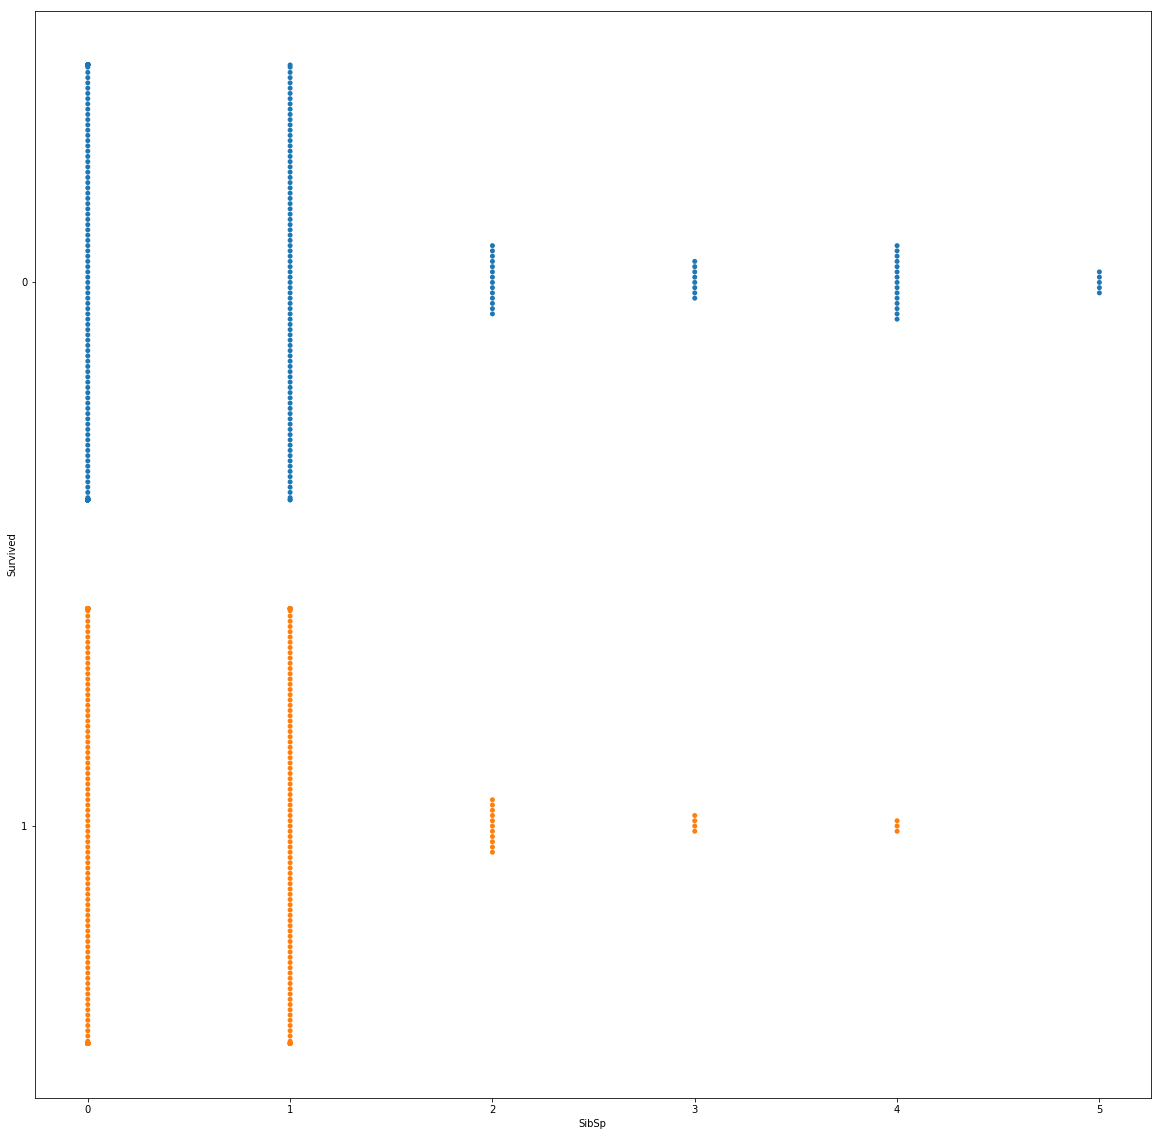

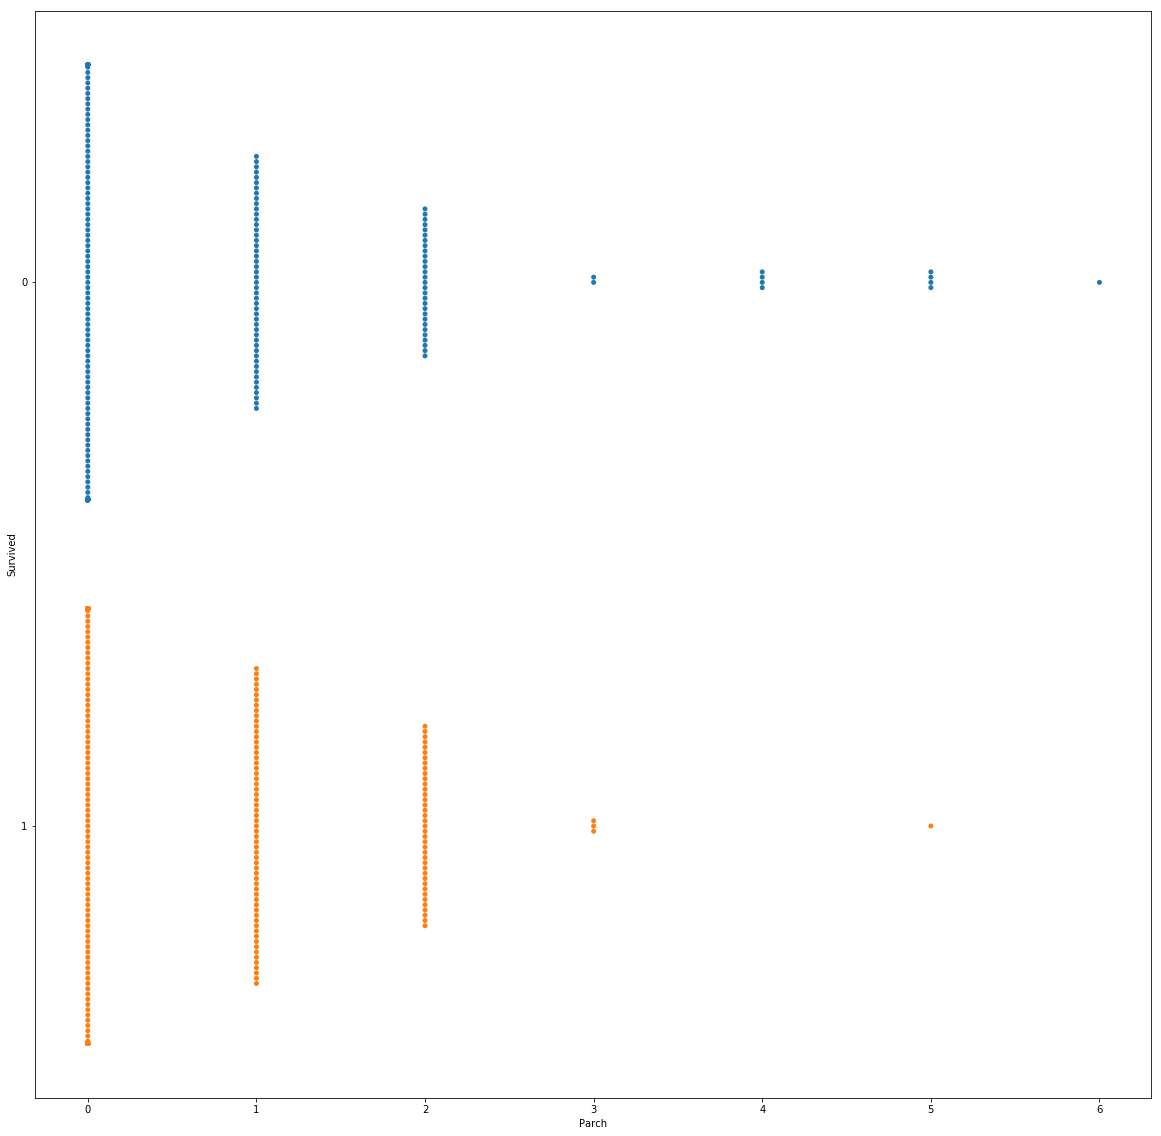

In [121]:
for var in TitanicRemoveNumVar:
    f, axes = plt.subplots(1, 1, figsize=(20, 20))
    sb.swarmplot(x = var , y = TitanicRemoveCatVar["Survived"], data = TitanicRemoveNumVar)

## Uni-Variate Decision Tree of Numerical Variables against Survived

Age v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6362275449101796

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6412556053811659



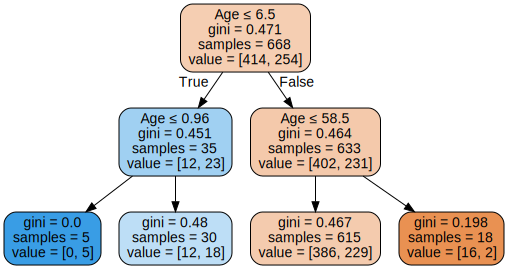

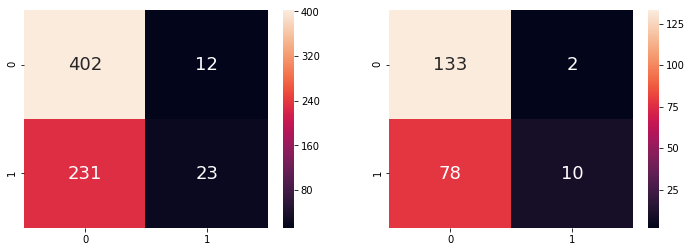

In [122]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Age = pd.DataFrame(TitanicMeanNumVar["Age"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6526946107784432

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5919282511210763



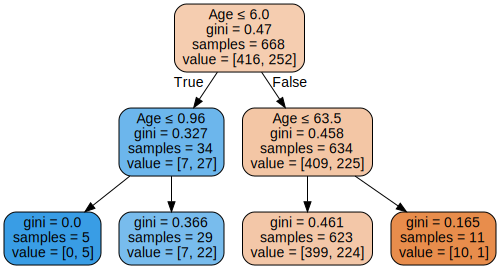

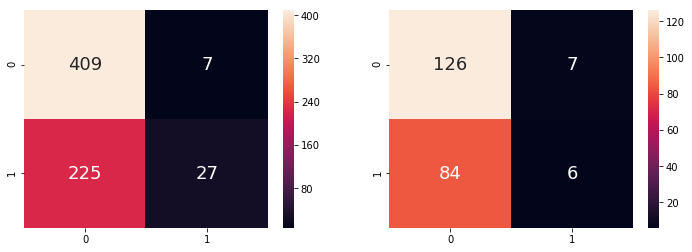

In [123]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Age = pd.DataFrame(TitanicMedianNumVar["Age"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

remove

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6224299065420561

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6089385474860335



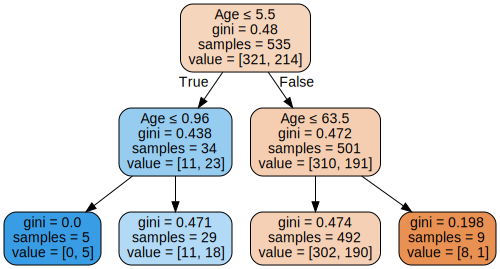

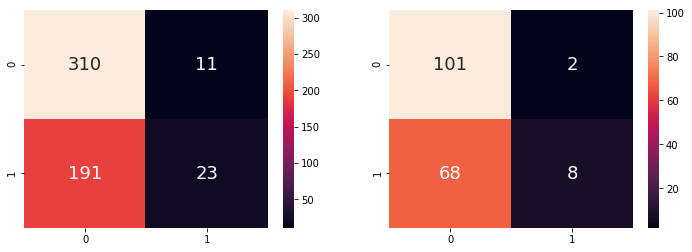

In [124]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicRemoveCatVar["Survived"])   # Response
Age = pd.DataFrame(TitanicRemoveNumVar["Age"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Age, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Fare v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6856287425149701

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6367713004484304



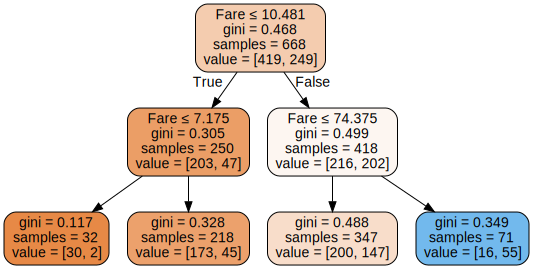

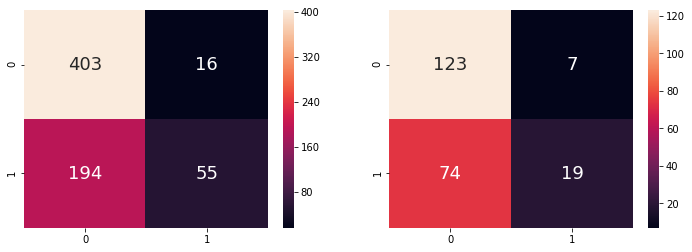

In [125]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Fare = pd.DataFrame(TitanicMeanNumVar["Fare"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Fare, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6736526946107785

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.672645739910314



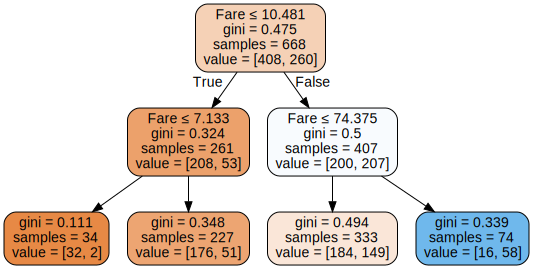

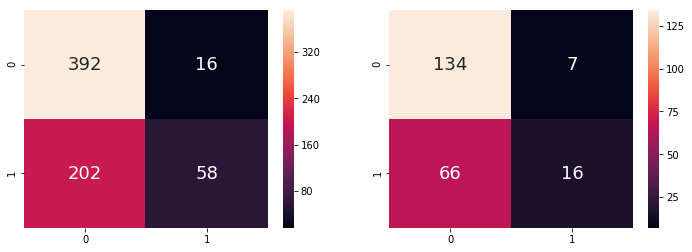

In [126]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Fare = pd.DataFrame(TitanicMedianNumVar["Fare"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Fare, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

remove

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6672897196261682

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7039106145251397



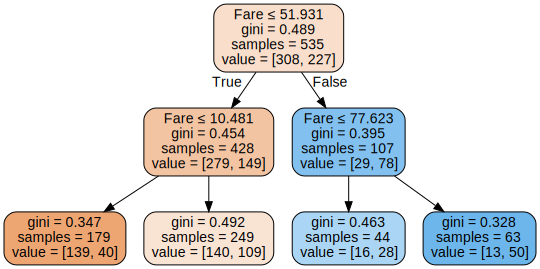

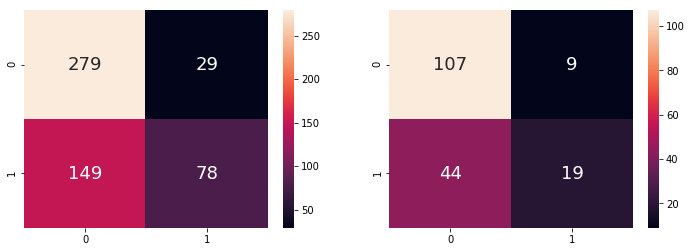

In [127]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicRemoveCatVar["Survived"])   # Response
Fare = pd.DataFrame(TitanicRemoveNumVar["Fare"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Fare, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

SibSp v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6317365269461078

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5919282511210763



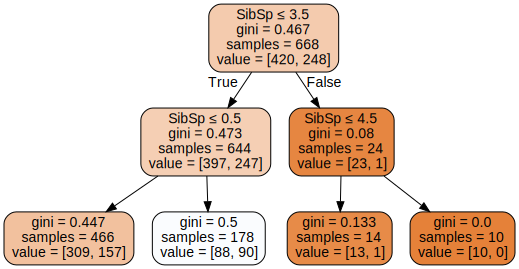

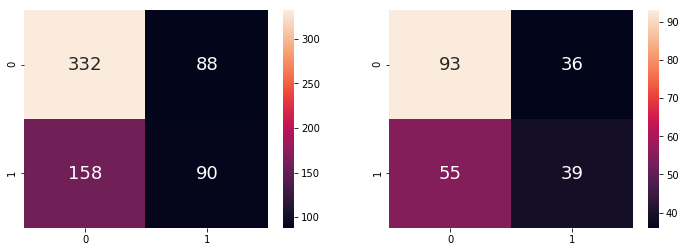

In [128]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
SibSp = pd.DataFrame(TitanicMeanNumVar["SibSp"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SibSp, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6362275449101796

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6143497757847534



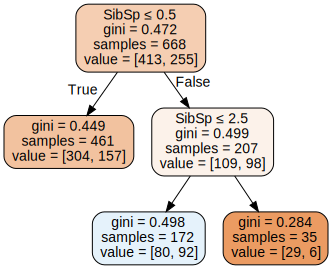

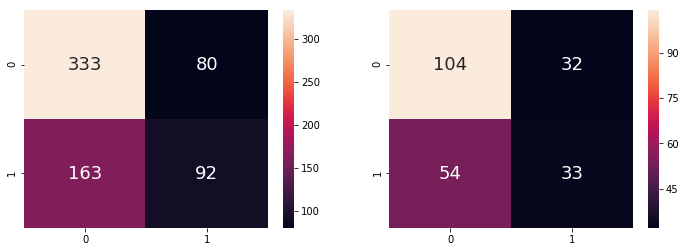

In [129]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
SibSp = pd.DataFrame(TitanicMedianNumVar["SibSp"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SibSp, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

remove

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6411214953271028

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4972067039106145



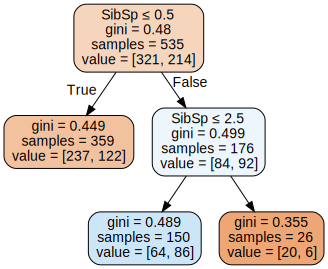

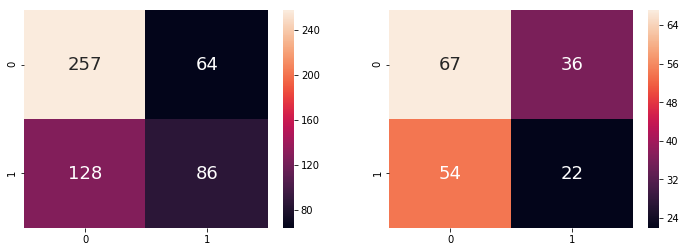

In [130]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicRemoveCatVar["Survived"])   # Response
SibSp = pd.DataFrame(TitanicRemoveNumVar["SibSp"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SibSp, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

Parch v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6482035928143712

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.57847533632287



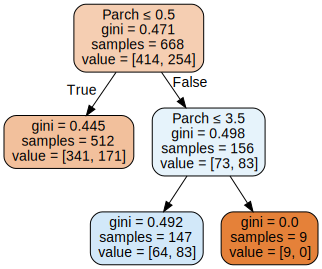

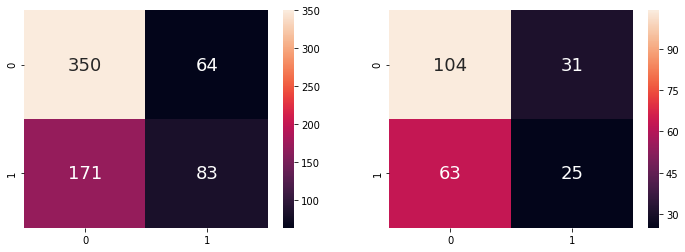

In [131]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMeanCatVar["Survived"])   # Response
Parch = pd.DataFrame(TitanicMeanNumVar["Parch"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Parch, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6287425149700598

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.57847533632287



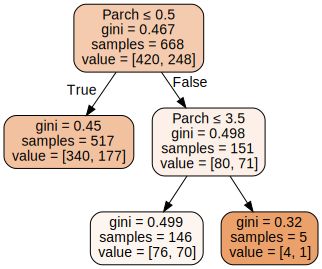

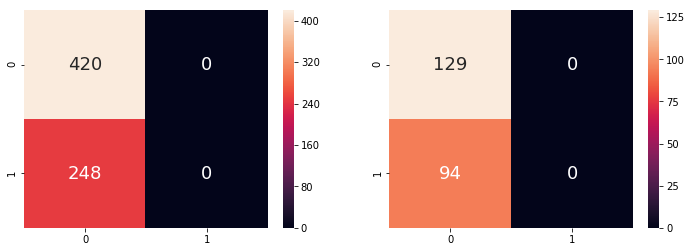

In [132]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicMedianCatVar["Survived"])   # Response
Parch = pd.DataFrame(TitanicMedianNumVar["Parch"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Parch, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

remove

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6261682242990654

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6256983240223464



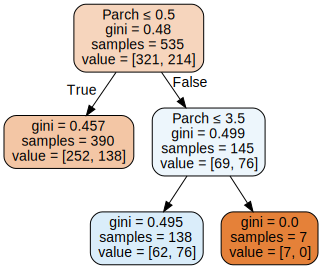

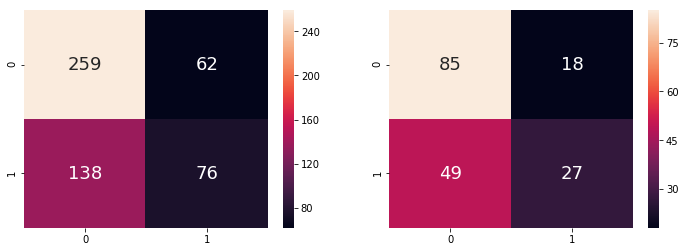

In [133]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

Survived = pd.DataFrame(TitanicRemoveCatVar["Survived"])   # Response
Parch = pd.DataFrame(TitanicRemoveNumVar["Parch"])       # Predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(Parch, Survived, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Survived corresponding to Age
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Multi-Variate Numerical Variables v Survived

mean

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7395209580838323

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7219730941704036



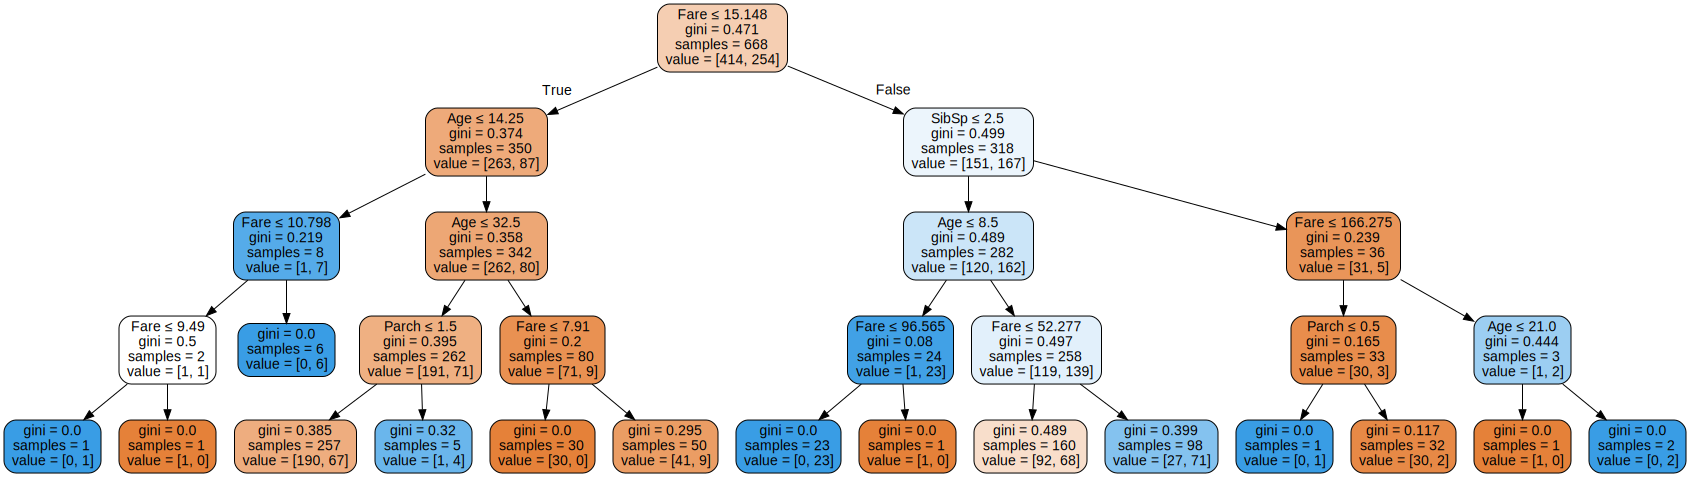

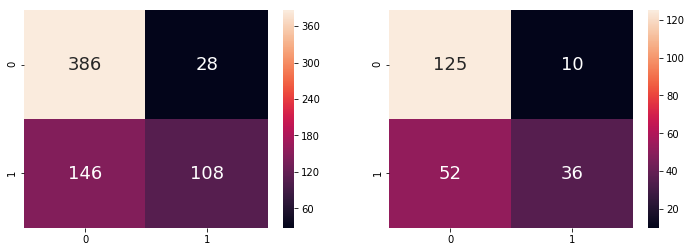

In [134]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMeanCatVar["Survived"])
X = pd.DataFrame(TitanicMeanNumVar[["Age", "Fare", "SibSp","Parch"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

median

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7395209580838323

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6860986547085202



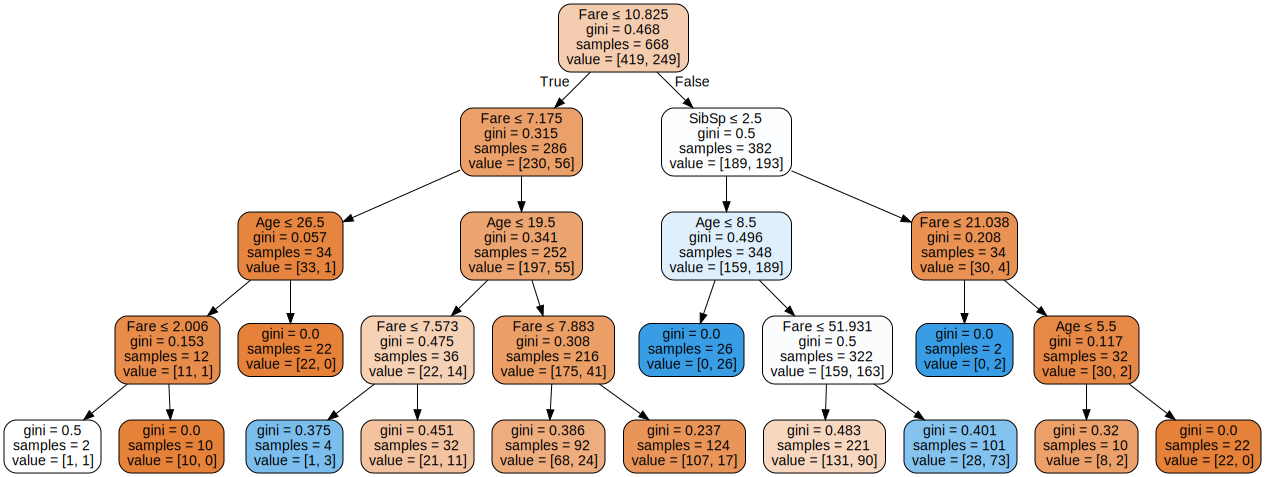

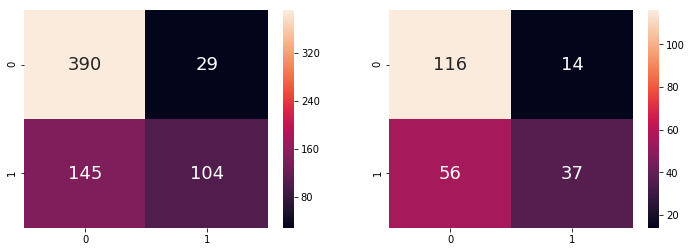

In [135]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicMedianCatVar["Survived"])
X = pd.DataFrame(TitanicMedianNumVar[["Age", "Fare", "SibSp","Parch"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

remove

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7383177570093458

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6983240223463687



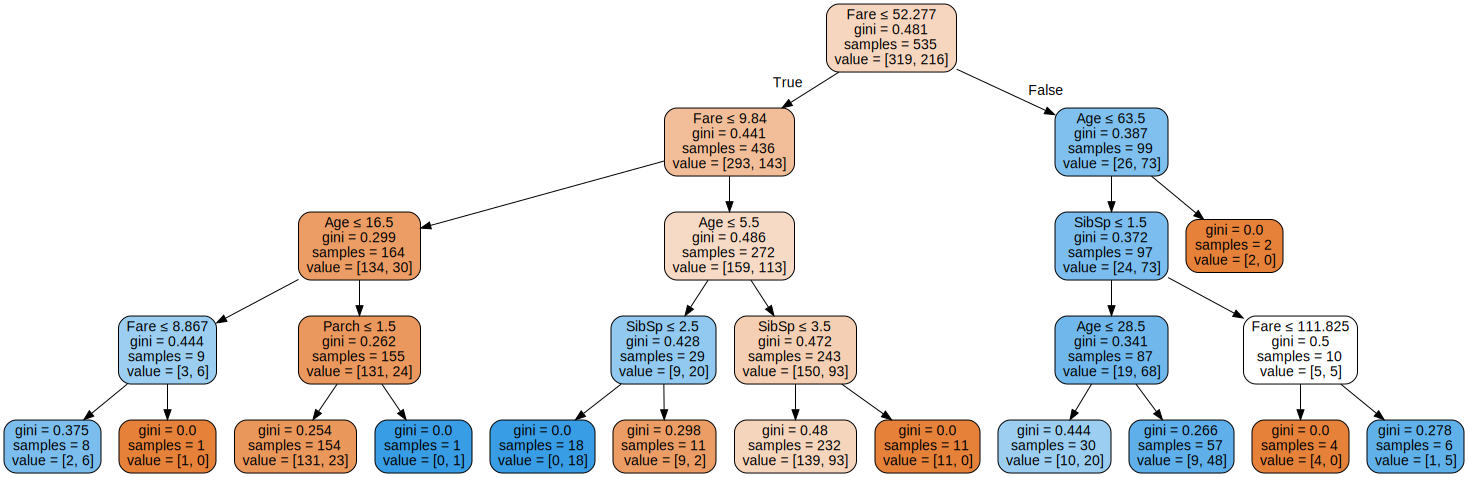

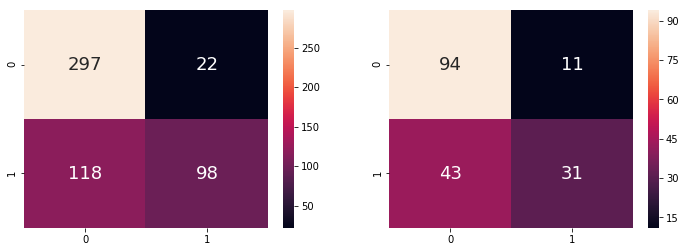

In [136]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

# Extract Response and Predictors
y = pd.DataFrame(TitanicRemoveCatVar["Survived"])
X = pd.DataFrame(TitanicRemoveNumVar[["Age", "Fare", "SibSp","Parch"]]) 

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)